<a href="https://colab.research.google.com/github/kyalan/CUHK-STAT5106-2020/blob/main/Week_11_Image_Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Reference: [NCSU Libraries Workshop, Nian Xiong](https://github.com/xn2333/OpenCV/blob/master/Seminar_Image_Processing_in_Python.ipynb)

# Connect to Google Drive

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

import os

# Your original folder
gdrive_folder = 'CUHK_STAT5106_2020/Week 11 - 28 Nov'
os.chdir(f'/content/gdrive/My Drive/{gdrive_folder}')

# check whether the folder is as your expected
print(os.listdir())

Mounted at /content/gdrive
['Week 11.gslides', 'Week 11 - Data Visuals.ipynb', 'Week 11 - Image Preprocessing.ipynb']


In [32]:
from skimage import io # good for image importing
import cv2 # the best image processing packages
import numpy as np # for reshaping and expanding axis
from matplotlib import pyplot as plt # for playing contour

# Import Images

In [3]:
# Confirm working directory
import os
print(os.getcwd())

/content/gdrive/My Drive/CUHK_STAT5106_2020/Week 11 - 28 Nov


In [4]:
! wget --no-check-certificate 'https://www.sta.cuhk.edu.hk/Portals/0/Images/Statistics/CHAN_PS.jpg' -O /content/CHAN_PS.jpg

--2020-11-24 14:22:59--  https://www.sta.cuhk.edu.hk/Portals/0/Images/Statistics/CHAN_PS.jpg
Resolving www.sta.cuhk.edu.hk (www.sta.cuhk.edu.hk)... 137.189.37.207
Connecting to www.sta.cuhk.edu.hk (www.sta.cuhk.edu.hk)|137.189.37.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 87556 (86K) [image/jpeg]
Saving to: ‘/content/CHAN_PS.jpg’

/content/CHAN_PS.jp 100%[===================>]  85.50K  --.-KB/s    in 0.05s   

2020-11-24 14:22:59 (1.83 MB/s) - ‘/content/CHAN_PS.jpg’ saved [87556/87556]



In [5]:
image = io.imread('/content/CHAN_PS.jpg') # this is in RGB colour code
# image = cv2.imread('/content/CHAN_PS.jpg') # this is in BGR colour code

RGB code : Red light ; Green light ; Blue light ; no light 0 --- 255 full light

so white = (255, 255, 255)

[reference here](https://en.wikipedia.org/wiki/RGB_color_model)

In [6]:
image # this is a 375 * 250 * 3 array

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [254, 255, 255],
        [254, 254, 254],
        [255, 255, 255]],

       ...,

       [[ 15,  15,  15],
        [ 19,  21,  20],
        [ 14,  18,  17],
        ...,
        [ 11,  13,  12],
        [ 11,  11,  11],
        [ 12,  14,  13]],

       [[ 20,  20,  20],
        [ 17,  19,  18],
        [ 18,  22,  21],
        ...,
        [ 10,  12,  11],
        [  8,   8,   8],
        [ 10,  14,  13]],

       [[ 19,  19,  19],
        [ 20,  22,  21],
        [ 17,  21,  20],
        ...,
        [ 10,  10,  10],
        [ 13,  15,  14],
        [ 14,  16,  15]]

# Choosing Colour Scales

Image type = <class 'numpy.ndarray'>
Image shape = (375, 250, 3)


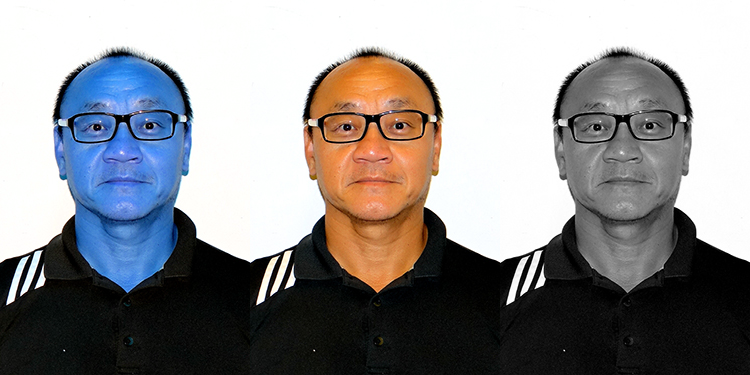

In [44]:
print(f'Image type = {type(image)}')
print(f'Image shape = {image.shape}')

# cv2.imshow(image)
# DisabledFunctionError: cv2.imshow() is disabled in Colab, because it causes Jupyter sessions
# to crash; see https://github.com/jupyter/notebook/issues/3935.

from google.colab.patches import cv2_imshow
images = [image # show in BGR
          , cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # show as original report 
          , cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)[:, :, np.newaxis] # grayscale
          ]
images[2] = np.repeat(images[2], 3, axis=2) # expand dimension to be (375, 250, 3)

combined_image = cv2.hconcat(images)
cv2_imshow(combined_image) 


# Transforming Colours

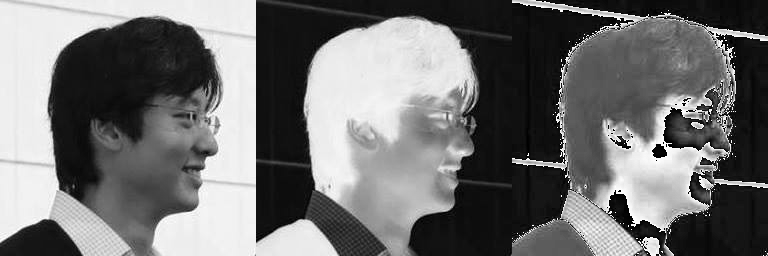

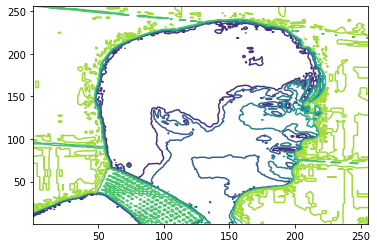

In [63]:
from skimage import io
imageT = io.imread('https://www.sta.cuhk.edu.hk/Portals/0/Images/Statistics/TS_side.jpg') # from URL, RGB colour code
imageT = cv2.cvtColor(imageT, cv2.COLOR_BGR2RGB) # RGB
imageT_gray = cv2.cvtColor(image20, cv2.COLOR_BGR2GRAY) # Grayscales

alpha, beta = 2, 50
imageTs = [imageT_gray
           , 255 - imageT_gray # black-write swapping
           , np.clip(alpha * imageT_gray + beta, 0, 255) # alpha for Contrast ; beta for Brightness
           , 
           ]
# Contrast & Brightness: https://docs.opencv.org/3.4/d3/dc1/tutorial_basic_linear_transform.html 
combined_imageT = cv2.hconcat(imageTs)
cv2_imshow(combined_imageT) 

plt.contour(imageT_gray, origin = "image") # contour

# Rotation

Rotation: [Ref](https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_geometric_transformations/py_geometric_transformations.html)

In [64]:
def image_rotator(image, deg):
    rows, cols = image.shape[:2]

    M = cv2.getRotationMatrix2D((cols/2, rows/2), deg, 1)
    dst = cv2.warpAffine(image, M, (cols, rows), borderValue=(255,255,255))
    return dst

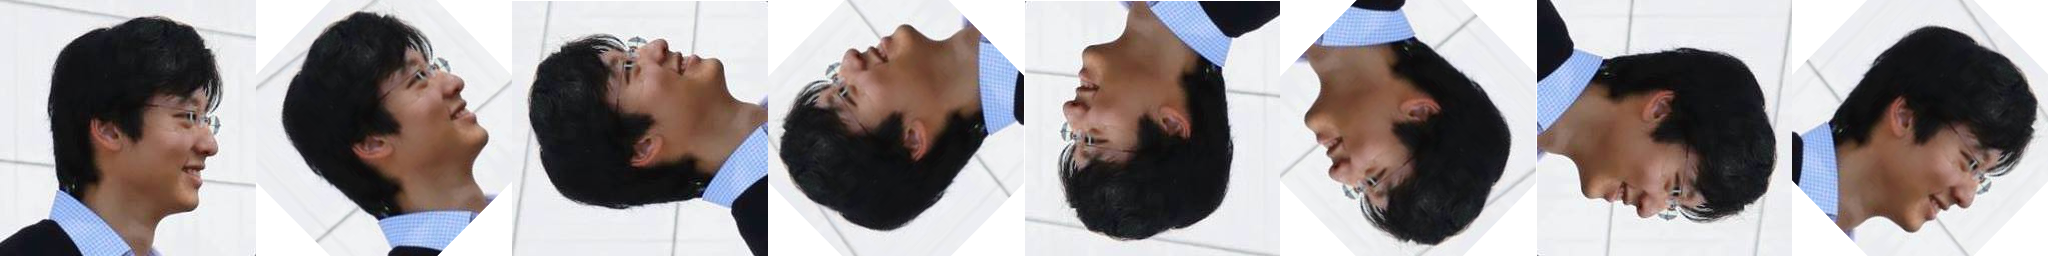

In [65]:
imageTs_rotate = [image_rotator(imageT, deg) for deg in np.arange(0, 360, 45)]
combined_imageT_rotate = cv2.hconcat(imageTs_rotate)
cv2_imshow(combined_imageT_rotate) 

# Image Overlaying

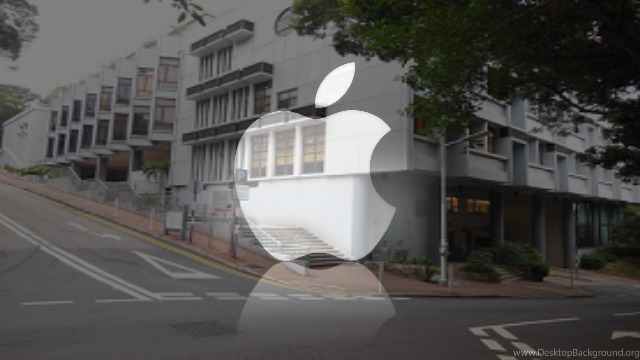

In [73]:
import cv2
from skimage import io

alpha = 0.5 # for transparency

img_apple = io.imread('https://wallpapercave.com/wp/wp3453765.jpg')
img_apple = cv2.cvtColor(img_apple, cv2.COLOR_BGR2RGB)
img_lsb = io.imread('https://www.sta.cuhk.edu.hk/portals/0/Public/Download/VisitUs/LadyShawBuilding-mini.jpg')
img_lsb = cv2.cvtColor(img_lsb, cv2.COLOR_BGR2RGB)


# Same Size
img_apple = cv2.resize(img_apple, (640, 360))
img_lsb = cv2.resize(img_lsb, (640, 360))

# blend images
beta = 1.0 - alpha
img_out = cv2.addWeighted(img_apple, alpha, img_lsb, beta, 0.0)

cv2_imshow(img_out)

# Other Superb Applications

Object Detection - [Reference](https://towardsdatascience.com/yolo-object-detection-with-opencv-and-python-21e50ac599e9)

Face Swapping - [Reference](https://analyticsindiamag.com/a-fun-project-on-building-a-face-swapping-application-with-opencv/)